# Computing string kernels in StringPhylo

This notebook demonstrates how to compute the $S$ matrix in StringPhylo. Given an $n \times p$ OTU table, the $S$ matrix is a $p \times p$ matrix of pairwise OTUs (or ASV) similarities. This is then used to compute the $n \times n$ matrix $K$ using $K = X S X^T$ (see Ish-Horowicz and Filippi, 2002).

Note that the string kernel computations in StringPhylo utilise the excellent (R) package kebabs  by Palme, Hochreiter and Bodenhofer (2015). Therefore `rpy2` is required, as is the R package BioStrings (available from Bioconducor).

In [1]:
# load required pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# tell rpy2 where to find the right R packages
from rpy2.robjects.packages import importr
base = importr('base')
base._libPaths()[0] = '~/anaconda3/envs/tf2-gpu/lib/R/library'

from stringphylo.kebab_wraps import spectrum_kernel, gappy_pair_kernel, mismatch_kernel, compute_Smat

In this simple example we will use random representative sequences for the OTUs.

The code below samples a representative sequence of length 200 for a dataset containing 300 OTUs.

In [2]:
# generate some random OTUs
alphabet = ["A", "G", "T", "C"]
n_OTUs = 300
rng = np.random.default_rng(1234256)

# store them as a series
repr_seqs = ["".join(rng.choice(alphabet, size=200).tolist()) for _ in range(n_OTUs)]
repr_seqs = pd.Series(repr_seqs, index=[f"OTU{x}" for x in range(300)])
repr_seqs

OTU0      AAGTAAGAAACAACTGACTGCCCATAATTTTTTATCCTCCCCAGAC...
OTU1      AAAGTCGCATTGTTGAATAAACCTCCTCTCATCACAGGCACGCCAT...
OTU2      AGATTTTGGTATTTTATCGCAGAAACCGAAACTGTGCGTTCAGGTC...
OTU3      GGGTAGATAGAACGATGTGCCAAGAAGTAACGGGGGCTTTTCGATA...
OTU4      CTCGGAAATGATCCTAGTTAGTAAGTAGGAAGGTTCTGTCCGCAAT...
                                ...                        
OTU295    ATTACCGATAATGAATGTGTGGCGAGCGATAAAGTGTGCATGAATA...
OTU296    AAACTCCGCGATCTAAGAGGCTGCGAACACTCATGTAAGAGCCTGT...
OTU297    ATCGGTGATGAGTTAGGGAGAATTGCGAAGCCTTCCAGCCATCGCT...
OTU298    CCTGCCTAATAGTCCAAGGCTCGGGAGTAAGCGGCTGTAACCAGTG...
OTU299    GGCTGCTACGAAAGACTAACGAAGGACAGTCGACCAAACATCCACG...
Length: 300, dtype: object

We compute the kernel in two stages:
1. construct the kernel using one of `spectrum_kernel`, gappy_pair_kernel` or `mismatch_kernel`, specifying the appropriate hyperparamters
2. compute the $S$ matrix using `compute_Smat(kern, repr_strings)

We then use the `compute_kernel` function to compute the $S$ matrix:

In [3]:
kern = spectrum_kernel(k=10) # construct kernel object
S = compute_Smat(kern, repr_seqs) # compute kernelmismatch_kernel

As there is no relationship between the OTU sequences (we sampled them at random), the $S$ matrix is close to the identity matrix: 

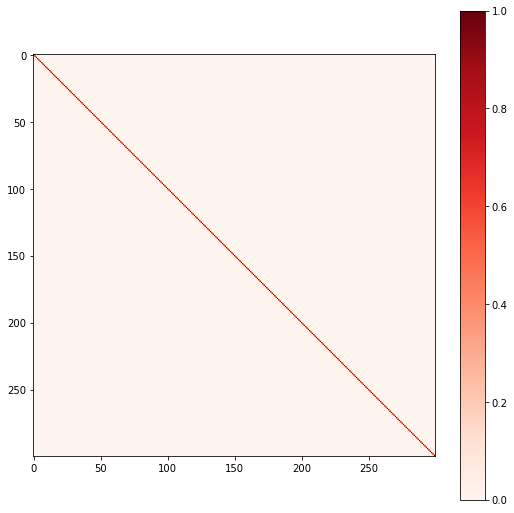

In [4]:
fig, ax = plt.subplots(figsize=(9, 9))
im = ax.imshow(S, cmap="Reds")
plt.colorbar(im)